## Getting the data

In this exercise, we work with a data set from [World Values Survey](http://www.worldvaluessurvey.org/WVSDocumentationWV6.jsp) who have extensive documentation on questions in the survey.

We focus on question V105: "I'd like to ask you how much you trust people people from this group completely, somewhat, not very from various groups. Could you tell me for each whether you trust much or not at all? People you meet for the first time"

In [1]:
library(foreign)

In [2]:
dataset = read.dta("WV6_Data_Turkey_2012_Stata_v20180912.dta")

Warning message in read.dta("WV6_Data_Turkey_2012_Stata_v20180912.dta"):
“value labels (‘V243_AU’) for ‘V243_AU’ are missing”Warning message in read.dta("WV6_Data_Turkey_2012_Stata_v20180912.dta"):
“value labels (‘V244_AU’) for ‘V244_AU’ are missing”Warning message in read.dta("WV6_Data_Turkey_2012_Stata_v20180912.dta"):
“value labels (‘V258A’) for ‘V258A’ are missing”Warning message in read.dta("WV6_Data_Turkey_2012_Stata_v20180912.dta"):
“value labels (‘SECVALWGT’) for ‘SECVALWGT’ are missing”

In [3]:
head( dataset )

V1,V2,V2A,V3,V4,V5,V6,V7,V8,V9,⋯,I_ABORTLIB,I_DIVORLIB,CHOICE,WEIGHT3B,I_VOICE1,I_VOICE2,I_VOI2_00,VOICE,WEIGHT4B,COW
<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2010-2013,Turkey,Turkey,1,Very important,Rather important,Very important,Not at all important,Dont know,Very important,⋯,0.222222,0.888889,0.370370,1,0.00,0.5,0.250,0.250,1,TUR Turkey
2010-2013,Turkey,Turkey,2,Very important,Rather important,Rather important,Not at all important,Very important,Very important,⋯,0.000000,0.000000,0.000000,1,0.66,0.5,0.580,0.580,1,TUR Turkey
2010-2013,Turkey,Turkey,3,Very important,Very important,Very important,Very important,Very important,Very important,⋯,0.555556,0.444444,0.444444,1,1.00,0.0,0.500,0.500,1,TUR Turkey
2010-2013,Turkey,Turkey,4,Very important,Very important,Rather important,Rather important,Not very important,Very important,⋯,0.000000,0.222222,0.074074,1,0.66,0.0,0.330,0.330,1,TUR Turkey
2010-2013,Turkey,Turkey,5,Very important,Very important,Very important,Very important,Very important,Very important,⋯,0.000000,0.000000,0.000000,1,0.00,0.0,0.000,0.000,1,TUR Turkey
2010-2013,Turkey,Turkey,6,Rather important,Rather important,Very important,Not at all important,Not at all important,Very important,⋯,0.000000,0.444444,0.148148,1,0.33,0.5,0.415,0.415,1,TUR Turkey


In [4]:
## here we dicotomize the variable to help in some analysis
## mark missing values NA
dataset$V105[ as.integer( dataset$V105 ) > 4 ] <- NA
dataset$V105[ as.integer( dataset$V105 ) <= 2 ] <- NA ## this helps us to work on binary data.
dataset$V105 <- droplevels( dataset$V105 )

dataset <- dataset[ complete.cases( dataset ), ]

summary( dataset$V105 )

Do not trust very much    Do not trust at all 
                   746                    498

## Splitting training and test data

To control the quality of your data analysis, we split the classified data into two groups. The first one, **training data** is used to develop and train the model. The second spllit is **testing data** which we use to explore how well we trained the mode. We shall never use testing data when we train the model so that we can evaluate the _accuracy_ of any model by showing it unseen data.

In [5]:
create_train_test <- function(data, size = 0.8, train = TRUE) {
    n_row = nrow(data)
    total_row = size * n_row
    train_sample <- 1:total_row
    if (train) {
        return (data[train_sample, ])
    } else {
        return (data[-train_sample, ])
    }
}

In [6]:
train <- create_train_test( dataset, train = TRUE )
test <- create_train_test( dataset, train = FALSE )

## Decision trees

[Decision trees](https://en.wikipedia.org/wiki/Decision_tree_learning) help in data classification by exploring how to best predicts belonging to some category, step by step. It creates a nice tree-like visualization.
They work best binary variables equally same size.

In [7]:
library(rpart)
library(rpart.plot)

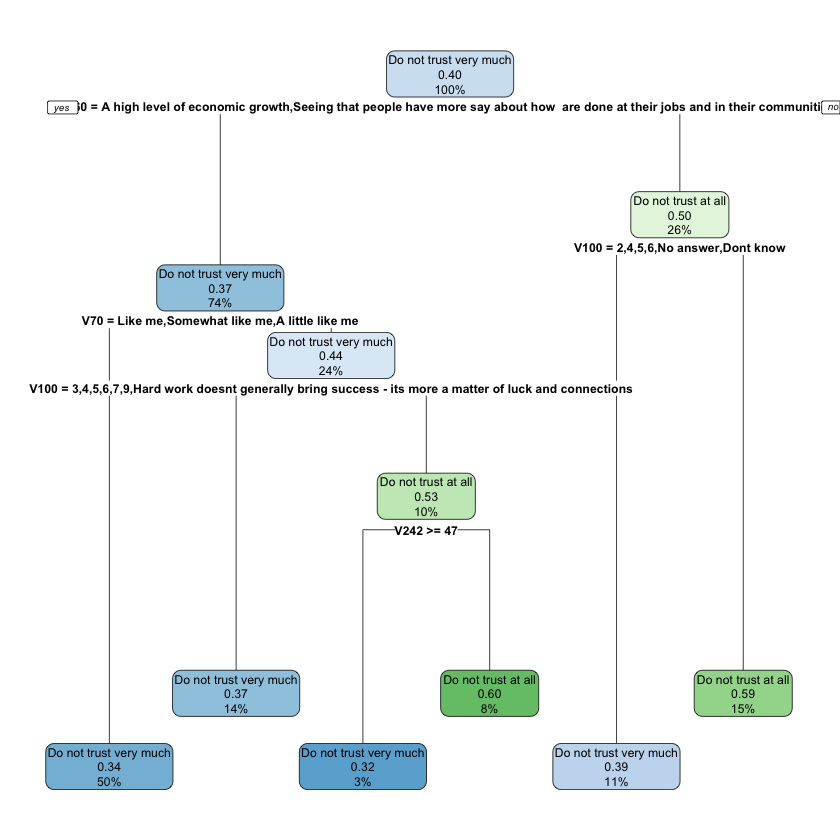

In [8]:
model_rpart <- rpart( V105 ~ V10 + V20 + V30 + V40 + V50 + V60 + V70 + V80 + V90 + V100 + V242, data = train, method = "class")
rpart.plot( model_rpart )

## Support vector machines

Support vector machines similarly are used to create a mechanism to classify content based on variables. Note how you can explore the importance of individual variables using `varImp`.

You can also use advanced techniques to improve the model prediction by **cross-validating** even when doing data analysis -- not only in the end when comparing results from train and test data. This means that the model is created several times with different splits (folds) of the dataset and they are used together to create the best model.

In [9]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [10]:
## heere we create crossvalidation
tc <- trainControl(
  method = "repeatedcv",
  returnResamp = "all",
  number = 2,
  repeats = 2
)

In [12]:
model_svm <- train( V105 ~ V10 + V20 + V30 + V40 + V50 + V60 + V70 + V80 + V90 + V100 + V242, data=train,
                    method="svmLinear", trControl = tc)

Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”Warning message in .local(x, ...):
“Variable(s) `' constant. Cannot scale data.”

In [13]:
varImp( model_svm, scale=TRUE )

ROC curve variable importance

     Importance
V60     100.000
V242     91.875
V40      58.734
V80      53.489
V50      35.805
V70      29.691
V20      19.395
V90       9.127
V10       6.242
V100      5.162
V30       0.000

In [14]:
varImp( model_svm, scale=FALSE )

ROC curve variable importance

     Importance
V60      0.5419
V242     0.5388
V40      0.5262
V80      0.5242
V50      0.5175
V70      0.5152
V20      0.5113
V90      0.5074
V10      0.5064
V100     0.5059
V30      0.5040

## Random forest

In [ ]:
model_rf <- train( V105 ~ V10 + V20 + V30 + V40 + V50 + V60 + V70 + V80 + V90 + V100 + V242, data=train, method="rf")

In [ ]:
plot( model_rf )

## Evaluating results

Now let's examine how well the models work with unseen test data.

In [ ]:
p <- predict( model_rf, test )
confusionMatrix( p, test$V105 )

## Continous variable

Above we worked with dataset that vas nominal, or classified. Let's move to work on dataset that is continous.

In [ ]:
hist( train$V242, xlab = "Age", main = "Age of responders" )

In [ ]:
model_lasso <- train( V242 ~ V10 + V20 + V30 , data=train, method="lmStepAIC")

In [ ]:
summary( model_lasso )

In [ ]:
test_lasso <- predict( model_lasso, test )

In [ ]:
cor( test_lasso, test$V242 )

In [ ]:
plot( test_lasso, test$V242 )